# **<span style="background: linear-gradient(to right, #33ccff, #ff99cc); -webkit-background-clip: text; color: transparent;">CSI Project</span>**
---

### <span style="background-image: linear-gradient(to right, #ff5733, #ffbd33); -webkit-background-clip: text; color: transparent; font-style: italic; font-weight: bold;">Data: German Credit Data</span>

#### <span style="background-image: linear-gradient(to right, #33ff77, #337aff); -webkit-background-clip: text; color: transparent; font-style: italic; font-weight: bold;">Columns:</span>

1. *Status of Existing Checking Account*  
2. *Duration in Month* 
3. *Credit History* 
4. *Purpose*
5. *Credit Amount* 
6. *Savings Account Bonds* 
7. *Present Employment Since*
8. *Installment Rate in Percentage of Disposable Income* 
9. *Personal Status and Sex*
10. *Other Debtors Guarantors*
11. *Present Residence Since*
12. *Property*
13. *Age in Years*
14. *Other Installment Plans*
15. *Housing*
16. *Number of Existing Credits at This Bank*
17. *Job*
18. *Number of People Being Liable to Provide Maintenance for*
19. *Telephone*
20. *Foreign Worker*
21. *Result*

---

### **Importing Dataset and Required Libraries**
##### *Importing Libraries*

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve,accuracy_score,classification_report

##### *Loading Dataset*

In [2]:
column_names = [
    "Status_of_existing_checking_account", "Duration_in_month", "Credit_history", "Purpose",
    "Credit_amount", "Savings_account_bonds", "Present_employment_since",
    "Installment_rate_in_percentage_of_disposable_income", "Personal_status_and_sex",
    "Other_debtors_guarantors", "Present_residence_since", "Property", "Age_in_years",
    "Other_installment_plans", "Housing", "Number_of_existing_credits_at_this_bank", "Job",
    "Number_of_people_being_liable_to_provide_maintenance_for", "Telephone", "foreign_worker","result"
]

df_numeric = pd.read_csv("../datasets/german.data", delimiter=r'\s+', header=None)
df_numeric.columns = column_names
df_numeric.head()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account_bonds,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors_guarantors,...,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,foreign_worker,result
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


---

### **Preprocessing**

#### *Checking Dtype of all Columns*

In [3]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status_of_existing_checking_account                       1000 non-null   object
 1   Duration_in_month                                         1000 non-null   int64 
 2   Credit_history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit_amount                                             1000 non-null   int64 
 5   Savings_account_bonds                                     1000 non-null   object
 6   Present_employment_since                                  1000 non-null   object
 7   Installment_rate_in_percentage_of_disposable_income       1000 non-null   int64 
 8   Personal_status_and_sex      

#### *LabelEncoding to convert Object to Numerical Data*

In [4]:
categorical_columns = [
    "Status_of_existing_checking_account", "Credit_history", "Purpose", 
    "Savings_account_bonds", "Present_employment_since", "Personal_status_and_sex", 
    "Other_debtors_guarantors", "Property", "Other_installment_plans", "Housing", 
    "Job", "Telephone", "foreign_worker"
]

label_encoder = LabelEncoder()
for column in categorical_columns:
    df_numeric[column] = label_encoder.fit_transform(df_numeric[column])

df_numeric.head()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account_bonds,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors_guarantors,...,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,foreign_worker,result
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,1
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,2
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,1
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,1
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,2


#### *Converting int64 to int32* 

In [5]:
for column in df_numeric.select_dtypes(include=['int64', 'int']).columns:
    df_numeric[column] = df_numeric[column].astype('int32')

In [6]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype
---  ------                                                    --------------  -----
 0   Status_of_existing_checking_account                       1000 non-null   int32
 1   Duration_in_month                                         1000 non-null   int32
 2   Credit_history                                            1000 non-null   int32
 3   Purpose                                                   1000 non-null   int32
 4   Credit_amount                                             1000 non-null   int32
 5   Savings_account_bonds                                     1000 non-null   int32
 6   Present_employment_since                                  1000 non-null   int32
 7   Installment_rate_in_percentage_of_disposable_income       1000 non-null   int32
 8   Personal_status_and_sex                

---

### **Exploratory Data Analysis ( EDA )**

#### *Checking for NULL Values*

In [7]:
df_numeric.isna().sum()

Status_of_existing_checking_account                         0
Duration_in_month                                           0
Credit_history                                              0
Purpose                                                     0
Credit_amount                                               0
Savings_account_bonds                                       0
Present_employment_since                                    0
Installment_rate_in_percentage_of_disposable_income         0
Personal_status_and_sex                                     0
Other_debtors_guarantors                                    0
Present_residence_since                                     0
Property                                                    0
Age_in_years                                                0
Other_installment_plans                                     0
Housing                                                     0
Number_of_existing_credits_at_this_bank                     0
Job     

---

#### **Saving Processed Dataset**

In [27]:
df_numeric.to_csv('../datasets/processed.csv', index=False)

### **Plotting Correlation Matrix**

In [9]:
corr_matrix = df_numeric.corr()

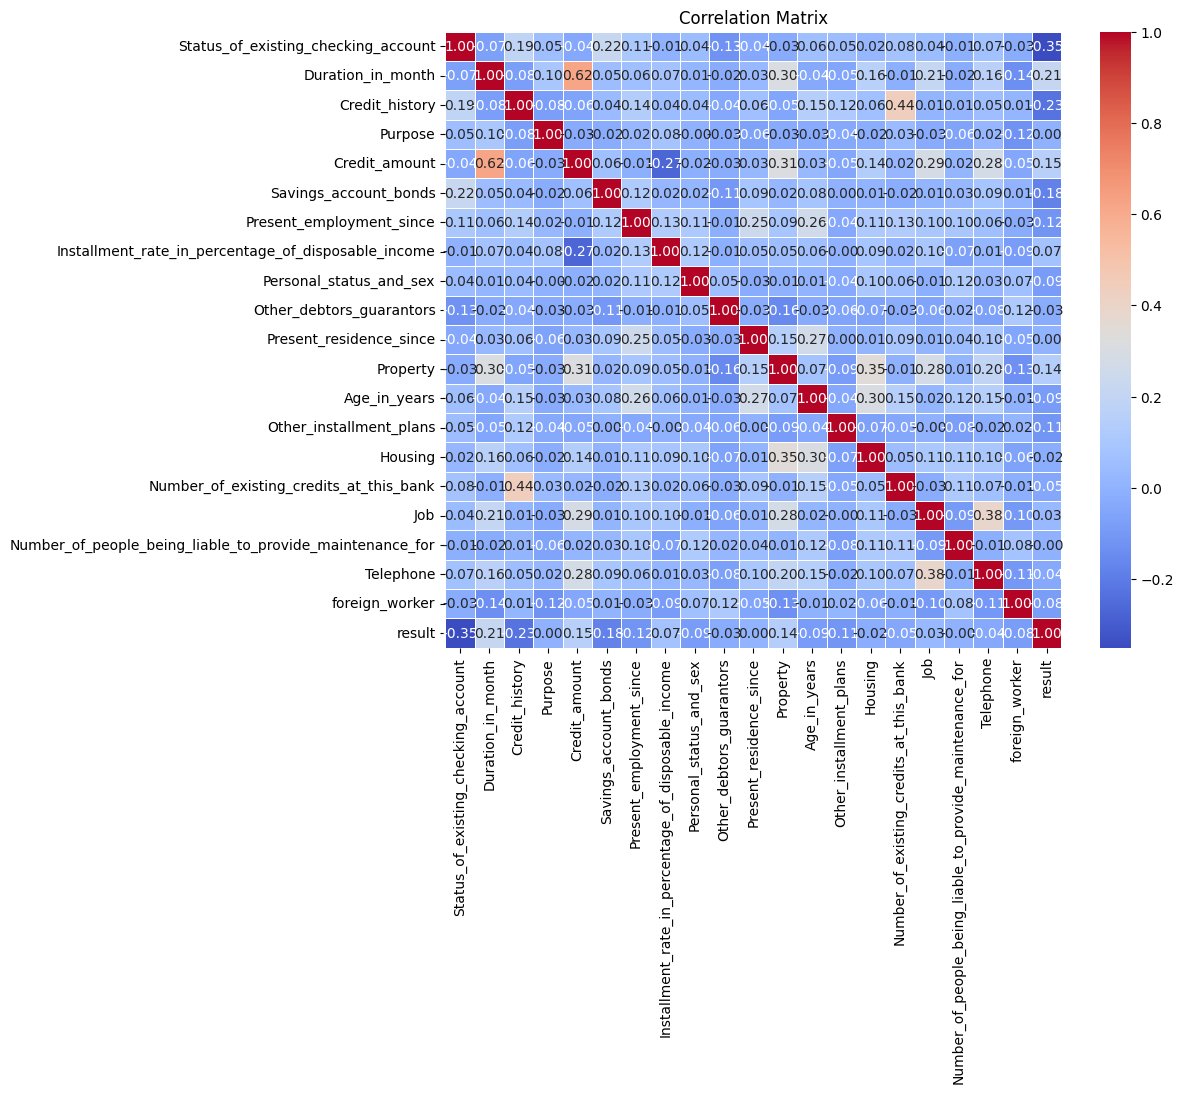

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### **Model Building** 

#### *Train-Test Split*

In [11]:
X = df_numeric.drop(columns=['result'])
y = df_numeric['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

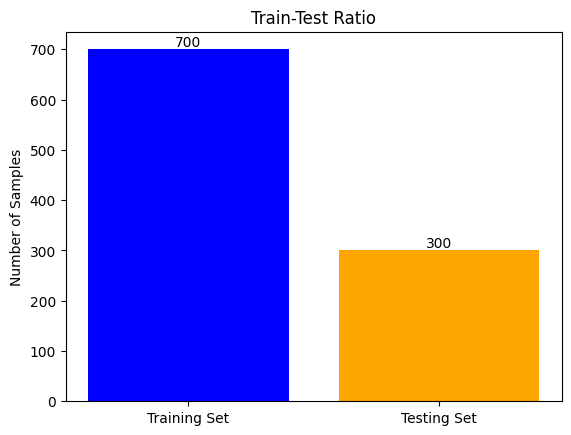

In [12]:
train_size = len(X_train)
test_size = len(X_test)

plt.bar(['Training Set', 'Testing Set'], [train_size, test_size], color=['blue', 'orange'])

for i, v in enumerate([train_size, test_size]):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.ylabel('Number of Samples')
plt.title('Train-Test Ratio')
plt.show()


#### *Model Training*

In [13]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred = rf_classifier.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.93      0.84       209
           2       0.68      0.35      0.46        91

    accuracy                           0.75       300
   macro avg       0.72      0.64      0.65       300
weighted avg       0.74      0.75      0.73       300



### **Visualization**

#### *Confusion Matrix*

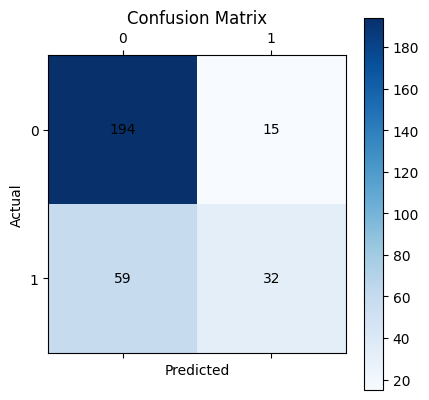

In [16]:
y_pred = rf_classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.matshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.show()


#### *ROC curve and calculating AUC*

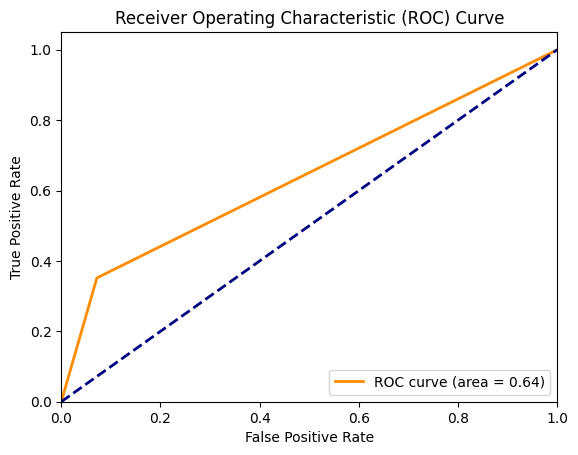

In [17]:
lb = LabelBinarizer()
y_test_binary = lb.fit_transform(y_test)

fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### *Precision-Recall curve*

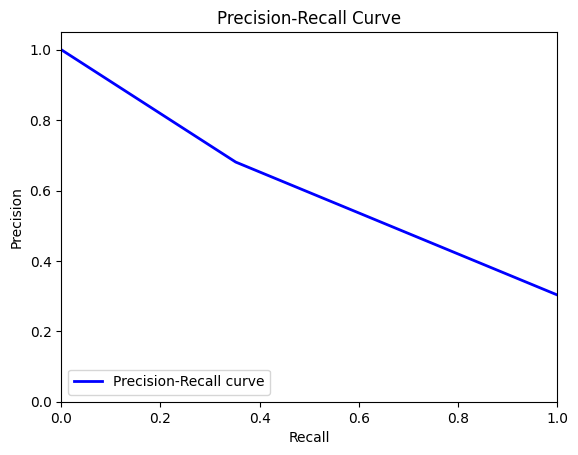

In [18]:
y_test_binary = lb.fit_transform(y_test)

precision, recall, _ = precision_recall_curve(y_test_binary, y_pred)

plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

#### *Results*

In [19]:
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.93      0.84       209
           2       0.68      0.35      0.46        91

    accuracy                           0.75       300
   macro avg       0.72      0.64      0.65       300
weighted avg       0.74      0.75      0.73       300



**<span style="background: linear-gradient(to right, #ff5733, #ffbd33); padding: 2px;">------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>**

### **Prediction Model**

In [20]:
df_numeric.head()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account_bonds,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors_guarantors,...,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,foreign_worker,result
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,1
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,2
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,1
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,1
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,2


In [21]:
def predict_result():
    input_data = []
    for column in column_names[:-1]:  
        value = input(f"Enter value for '{column}': ")
        input_data.append(value)
    input_df = pd.DataFrame([input_data], columns=column_names[:-1])
    prediction = rf_classifier.predict(input_df)
    if prediction[0] == 1:
        print("The model predicts that the result is 'Good Credit'")
    else:
        print("The model predicts that the result is 'Bad Credit'")

# predict_result()

**<span style="background: linear-gradient(to right, #ff5733, #ffbd33); padding: 2px;">------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>**

### **Performing PCA**

In [22]:
df_numeric.head()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account_bonds,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors_guarantors,...,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,foreign_worker,result
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,1
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,2
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,1
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,1
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,2


In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
principal_components = pca.fit_transform(df_numeric)

In [24]:
X_trainPCA, X_testPCA, y_trainPCA, y_testPCA = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
rfPCA = RandomForestClassifier(n_estimators=100, random_state=42)

rfPCA.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.93      0.84       209
           2       0.68      0.35      0.46        91

    accuracy                           0.75       300
   macro avg       0.72      0.64      0.65       300
weighted avg       0.74      0.75      0.73       300



**<span style="background: linear-gradient(to right, #ff5733, #ffbd33); padding: 2px;">------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>**